<img src='https://www.icos-cp.eu/sites/default/files/2017-11/ICOS_CP_logo.png' width=400 align=right>

# ICOS Carbon Portal Python Library
## Example: Reading a ObsPack collection

We will showcase two different methods or ways of reading the OpsPack data with python

1. Download the file, unpack und load the data
2. Access the collection usgin our python library, directly into memory, no need to download. This works external, (on your computer) or after you login to this Jupyter Service from the ICOS Carbon Portal.

## Documentation
Full documentation for the ICOS python library is availalbe on the [project page](https://icos-carbon-portal.github.io/pylib/), how to install and wheel on [pypi.org](https://pypi.org/project/icoscp/), source is available on [github](https://github.com/ICOS-Carbon-Portal/pylib)

## Introduction
The goal of this notebook is to show you the ease of use of Jupyter Notebooks and to familiarize you with ObsPack collections and the files stored within these ObsPacks. This notebook will first show how to read in a local NetCDF file that originates from an ObsPack collection (for a specific station, tracer, and measurement height), and how to subset and plot the measurements within the file. 

In a next step, we will show how to read in an ObsPack file using the ICOS Python Library (i.e. the *pylib* Python package). This is an API that allows you to read in all data stored on the ICOS Carbon Portal without having to read the data into local memory, providing an efficient way to read in and process atmospheric measurements and model results.

Even though direct access of ObsPack collections is not yet supported by the *pylib* in a convenient way, we will show you an alternative way of accessing the ObsPack collections through the internal ICOS servers.

## Import python packages
Note: We chose to make use of the xarray package instead of the netCDF4 package, as the former is more versatile and better supported.

In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
# Make the matplotlib figures interactive with 
# zoom, pan, move, save figures etc..
# %matplotlib widget
from pylab import plot, boxplot, setp
import seaborn as sns
color_pal = sns.color_palette()
import zipfile
import datetime
import numpy as np
import math
from tqdm.notebook import tqdm
import pandas as pd
from icoscp.collection import collection
from icoscp.cpb.dobj import Dobj

/opt/conda/lib/python3.10/site-packages/icoscp/cpauth/exceptions.py:42: FutureWarning: 
The ICOS Carbon Portal python library (>=0.1.19) requires user authentication for external users.
Only credentials used for password sign-in at https://cpauth.icos-cp.eu/ can be used for authentication.
Internal users (ICOS CP Jupyter Notebook services) are exempt.
For the authentication module documentation, follow this link: https://icos-carbon-portal.github.io/pylib/modules/#authentication
To suppress this message we refer to the documentation here: https://icos-carbon-portal.github.io/pylib/faq/#how-do-i-suppress-warnings
  warnings.warn(warning, category=FutureWarning)


# 1. Download the file, unpack und load the data

### How to read in a local NetCDF file coming from an ObsPack collection

#### Read in the data
The following NetCDF file will be used as an example: co2_cbw_tower-insitu_445_allvalid-207magl.nc. This file contains CO2 mole fraction observations from the Cabauw station at 207 meters a.g.l.
Files like this are available, if you download the collection from the data portal ( [https://www.icos-cp.eu/data-products/CEC4-CAGK](https://www.icos-cp.eu/data-products/CEC4-CAGK) ). Then you can work offline on your own computer. For this demo, we have made one of the files available in the current 'data' folder

In [2]:
# Give the path of local nc file
path = './data/co2_cbw_tower-insitu_445_allvalid-207magl.nc'

# Open the local nc file
cbw_data = xr.open_dataset(path)

# Explore some of the characteristics of the data
print("These are the dimensions of the data set:")
print(str(list(cbw_data.coords)) + "\n")

print("These are the variables of the data set:")
print(str(list(cbw_data.keys())))

These are the dimensions of the data set:
['time']

These are the variables of the data set:
['start_time', 'datetime', 'time_decimal', 'time_components', 'solartime_components', 'value', 'nvalue', 'value_std_dev', 'latitude', 'longitude', 'altitude', 'intake_height', 'qc_flag', 'quality_id', 'instrument', 'icos_datalevel', 'icos_LTR', 'icos_SMR', 'icos_STTB', 'obs_flag', 'obspack_id', 'assimilation_concerns', 'obs_num', 'obspack_num']


### Explore the ObsPack entry

In [3]:
cbw_data

<xarray.Dataset>
Dimensions:                (time: 178421, calendar_components: 6,
                            dim_concerns: 6)
Coordinates:
  * time                   (time) datetime64[ns] 1992-10-23T13:30:00 ... 2020...
Dimensions without coordinates: calendar_components, dim_concerns
Data variables: (12/24)
    start_time             (time) datetime64[ns] ...
    datetime               (time) |S20 ...
    time_decimal           (time) float64 ...
    time_components        (time, calendar_components) float32 ...
    solartime_components   (time, calendar_components) float32 ...
    value                  (time) float32 ...
    ...                     ...
    icos_STTB              (time) float32 ...
    obs_flag               (time) float32 ...
    obspack_id             (time) |S200 ...
    assimilation_concerns  (time, dim_concerns) int8 ...
    obs_num                (time) int32 ...
    obspack_num            (time) int32 ...
Attributes: (12/62)
    site_code:                                CBW
    site_name:                                Cabauw
    site_country:                             NL
    site_latitude:                            51.9703
    site_longitude:                           4.9264
    site_elevation:                           0.0
    ...                                       ...
    obspack_identifier_link:                  https://doi.org/10.18160/CEC4-CAGK
    obspack_citation:                         ICOS RI, Bergamaschi, P., Colom...
    Conventions:                              CF-1.7
    nc.institution:                           Unidata
    source:                                   ICOS RI
    history:                                  2023-04-26 22:40:28.705218 Pyth...

### Subset the data

In [4]:
# Select a time period of interest. Here: JJA 2018
cbw_subset = cbw_data.sel(time=slice('2018-06-01', '2018-09-01'))

### Creating a CO2 mixing ratio timeseries

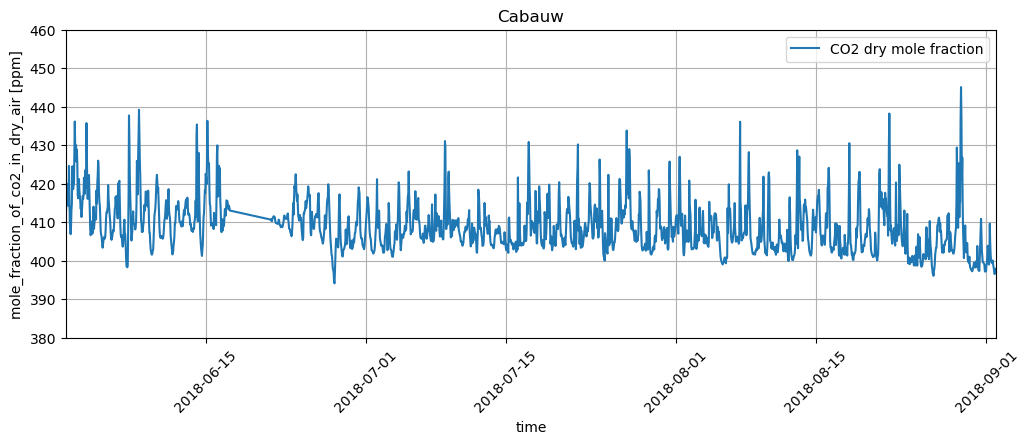

In [5]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(12,4))
ax.grid(zorder=0)
plt.plot(cbw_subset.time, cbw_subset.value * 1e6, '-', zorder=2, label = 'CO2 dry mole fraction')
ax.set_title(cbw_subset.site_name)
ax.set_ylabel(str(cbw_data.value.standard_name) + ' [ppm]')
ax.set_xlabel('time')
ax.set_xlim([min(cbw_subset.time),max(cbw_subset.time)])
ax.set_ylim([380,460])
plt.xticks(rotation = 45)
plt.legend()

# if you want to save the image... uncomment the following line
# plt.savefig('co2_cabauw.png')

### Assigning a new variable to the ObsPack using xarray

In [6]:
## Create a synthetic mole fraction observation variable with a randomized uncertainty (noise)
noise = np.random.normal(2.1e-6, 1.5e-6, len(cbw_subset.value))
model = cbw_subset.value + noise

## Insert the newly created variable into the ObsPack
## (Use the xr.assign() function)
cbw_subset = cbw_subset.assign(model=model)
cbw_subset

<xarray.Dataset>
Dimensions:                (time: 2128, calendar_components: 6, dim_concerns: 6)
Coordinates:
  * time                   (time) datetime64[ns] 2018-06-01T00:30:00 ... 2018...
Dimensions without coordinates: calendar_components, dim_concerns
Data variables: (12/25)
    start_time             (time) datetime64[ns] ...
    datetime               (time) |S20 ...
    time_decimal           (time) float64 ...
    time_components        (time, calendar_components) float32 ...
    solartime_components   (time, calendar_components) float32 ...
    value                  (time) float32 0.0004131 0.0004147 ... 0.0003979
    ...                     ...
    obs_flag               (time) float32 ...
    obspack_id             (time) |S200 ...
    assimilation_concerns  (time, dim_concerns) int8 ...
    obs_num                (time) int32 ...
    obspack_num            (time) int32 ...
    model                  (time) float64 0.0004152 0.0004192 ... 0.0004028
Attributes: (12/62)
    site_code:                                CBW
    site_name:                                Cabauw
    site_country:                             NL
    site_latitude:                            51.9703
    site_longitude:                           4.9264
    site_elevation:                           0.0
    ...                                       ...
    obspack_identifier_link:                  https://doi.org/10.18160/CEC4-CAGK
    obspack_citation:                         ICOS RI, Bergamaschi, P., Colom...
    Conventions:                              CF-1.7
    nc.institution:                           Unidata
    source:                                   ICOS RI
    history:                                  2023-04-26 22:40:28.705218 Pyth...

### Adding the synthetic simulation results to the timeseries

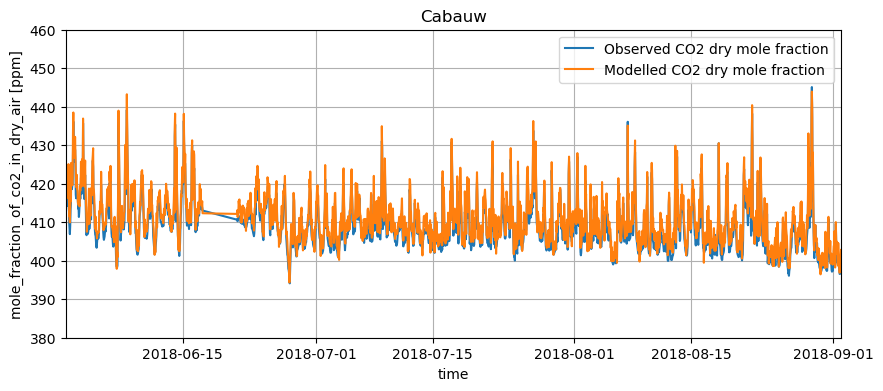

In [7]:
## Make a timeseries plot similar to the one before, but now adding the synthetic model results
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(10,4))
ax.grid(zorder=0)
plt.plot(cbw_subset.time, cbw_subset.value * 1e6, '-', zorder=2, label = 'Observed CO2 dry mole fraction')
plt.plot(cbw_subset.time, cbw_subset.model * 1e6, '-', zorder=2, label = 'Modelled CO2 dry mole fraction')
ax.set_title(cbw_subset.site_name)
ax.set_ylabel(str(cbw_data.value.standard_name) + ' [ppm]')
ax.set_xlabel('time')
ax.set_xlim([min(cbw_subset.time),max(cbw_subset.time)])
ax.set_ylim([380,460])
plt.xticks(rotation = 0)
plt.legend()

### Plotting a timeseries of the residuals

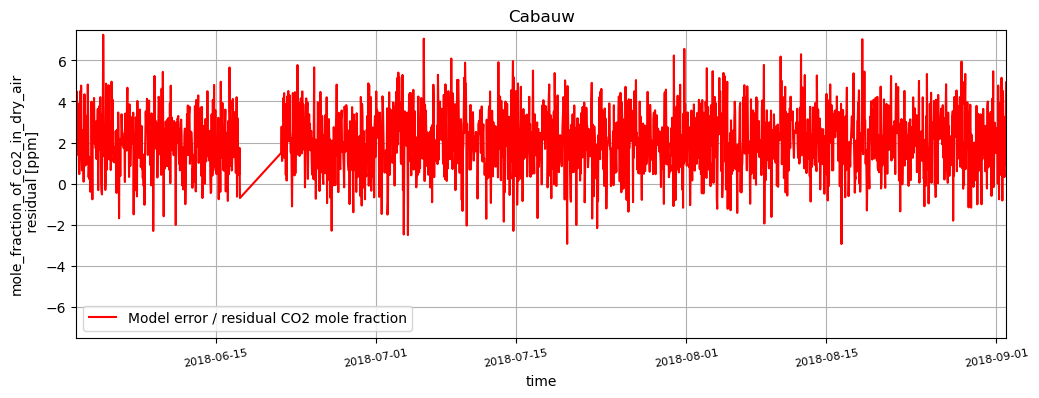

In [8]:
## Make a residual timeseries plot
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(12,4))
ax.grid(zorder=0)
plt.plot(cbw_subset.time, (cbw_subset.model - cbw_subset.value) * 1e6, '-', c = 'r', zorder=2, label = 'Model error / residual CO2 mole fraction')
ax.set_title(cbw_subset.site_name)
ax.set_ylabel(str(cbw_data.value.standard_name) + '\n residual [ppm]')
ax.set_xlabel('time')
ax.set_xlim([min(cbw_subset.time),max(cbw_subset.time)])
ax.set_ylim([-7.5,7.5])
plt.xticks(rotation = 10, fontsize=8)
plt.legend()

In [9]:
## Calcualte the RMSE between the observed and synthetic CO2 mole fractions
MSE = np.square(np.subtract(cbw_subset.value,cbw_subset.model)).mean() 
MSE_ppm = np.square(np.subtract(cbw_subset.value*1e6,cbw_subset.model*1e6)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE_ppm = math.sqrt(MSE_ppm)
print("Root Mean Square Error:")
print(RMSE)

print("Root Mean Square Error (in ppm):")
print(RMSE_ppm)

Root Mean Square Error:
2.5494010561367383e-06
Root Mean Square Error (in ppm):
2.5494010889005034


# 2. Access the collection using our python library
directly into memory, no need to download. This works external, (on your computer) or after you login to this Jupyter Service from the ICOS Carbon Portal.
## Read the collection of ObsPack files
Now we proceed to read the collection of ObsPack files directly into memory, you can think of a collection as a zip file, containing many files. **Be aware... there might be a LOT of files**, the following example contains 132 data objects, and loading them all in to memory can make things slow. The ObsPack is published with a DOI [https://doi.org/10.18160/CEC4-CAGK](https://doi.org/10.18160/CEC4-CAGK), that is what we are using to access the data and meta data

### Import the ICOS python library

In [10]:
# official DOI
collection_doi = '10.18160/CEC4-CAGK'

# get all datasets in the collection. Returns a list of icoscp.Dobj including meta data about the collection itself.
coll = collection.get(collection_doi)

100%|██████████| 132/132 [00:10<00:00, 12.11it/s]


### Display information about the collection

In [11]:
print(coll.title,' \n') 
print(coll.description,' \n') 
print(coll.citation,' \n') 

European Obspack compilation of atmospheric carbon dioxide data from ICOS and non-ICOS European stations for the period 1972-2023; obspack_co2_466_GLOBALVIEWplus_v8.0_2023-04-26  

This data package contains high accuracy CO2 dry air mole fractions from 58 ICOS and non-ICOS European observatories at in total 132 observation levels, collected by the ICOS Atmosphere Thematic Centre (ATC) and provided by the station contributors. The package is part of the Globalviewplus v8.0 data product, released in 2022 and is intended for use in carbon cycle inverse modeling, model evaluation, and satellite validation studies. Please report errors and send comments regarding this product to the ObsPack originators. Please read carefully the ObsPack Fair Use statement and cite appropriately. This is the sixth release of the GLOBALVIEWplus (GV+) cooperative data product. Please review the release notes for this product at www.esrl.noaa.gov/gmd/ccgg/obspack/release_notes.html. Metadata for this product a

### A list of all the 'files' or data sets inluded
We will display on the first 5, but actually there are many more

In [12]:
coll.datalink[0:5]

['https://meta.icos-cp.eu/objects/XMwHGw3rAYgaPbQqkKhX3F6O',
 'https://meta.icos-cp.eu/objects/4IX7g8I9hs60OcTbTpGl6NYZ',
 'https://meta.icos-cp.eu/objects/jOipm58J-lJFp1CIuy-ijd8t',
 'https://meta.icos-cp.eu/objects/G8I4MRMUzS-hllMOQXZnpLru',
 'https://meta.icos-cp.eu/objects/ViR2mCBQdiRCdvEXPI0HQpr9']

In [13]:
coll.data[0:5]

### Look at a dataset
The collection contains already a list of data objects as displayed above. A data object contains meta data about the dataset and allows direct access to the actual measurements
Please have a look at the documentation of the 'pylib' for further details on how to work with collections and datasets. For the moment we will just use the .data option which provides a list for all dataobject within the collection. This time we will use plotly to create box plots for all the stations. But before we loop through all the files, we have a look at the first data set file from the collection.

In [14]:
# configure all the digital objects, to make sure we have the correct timestamp
for do in coll.data:
    do.dateTimeConvert = False

In [15]:
dataset = coll.data[25] # just choosing a random station out of the collection

In [16]:
data = dataset.data
data.head()

,icos_LTR,icos_SMR,icos_STTB,icos_datalevel,qc_flag,time,value,value_std_dev
0,0.000000e+00,1.927820e-08,3.500000e-08,-2147483648,O,2013-04-25 15:30:00,0.000399,2.330000e-07
1,0.000000e+00,1.927820e-08,3.500000e-08,-2147483648,O,2013-04-25 16:30:00,0.000399,7.500000e-08
2,0.000000e+00,1.927820e-08,3.500000e-08,-2147483648,O,2013-04-25 17:30:00,0.000399,2.030000e-07
3,1.626350e-08,1.927820e-08,3.500000e-08,-2147483648,O,2013-04-25 18:30:00,0.000399,1.590000e-07
4,1.626350e-08,1.927820e-08,3.500000e-08,-2147483648,O,2013-04-25 19:30:00,0.000399,3.020000e-07


### Dataframe adjustments
To work with the dataset we create a function to add some conveniences:
- add a few features (so we can group by month or year
- change the index to datetime, makes it much easier to plot time series data
- add a column with 'ppm' values

In [17]:
# create a function to add some features for data analysis
def data_feature(df):
    # set index to datetime
    df.index = pd.to_datetime(df.time)
    
    # add colums to aggregate on
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    
        # multiply the *value* with 10^6 to disply 'ppm'
    df['ppm'] = df.value * 1e6
    
    return df
    

In [18]:
data = data_feature(data)
data.head()

,icos_LTR,icos_SMR,icos_STTB,icos_datalevel,qc_flag,time,value,value_std_dev,day,month,year,ppm
time,,,,,,,,,,,,
2013-04-25 15:30:00,0.000000e+00,1.927820e-08,3.500000e-08,-2147483648,O,2013-04-25 15:30:00,0.000399,2.330000e-07,25,4,2013,398.884993
2013-04-25 16:30:00,0.000000e+00,1.927820e-08,3.500000e-08,-2147483648,O,2013-04-25 16:30:00,0.000399,7.500000e-08,25,4,2013,399.006007
2013-04-25 17:30:00,0.000000e+00,1.927820e-08,3.500000e-08,-2147483648,O,2013-04-25 17:30:00,0.000399,2.030000e-07,25,4,2013,398.820994
2013-04-25 18:30:00,1.626350e-08,1.927820e-08,3.500000e-08,-2147483648,O,2013-04-25 18:30:00,0.000399,1.590000e-07,25,4,2013,398.901000
2013-04-25 19:30:00,1.626350e-08,1.927820e-08,3.500000e-08,-2147483648,O,2013-04-25 19:30:00,0.000399,3.020000e-07,25,4,2013,398.731994


### Simple plot

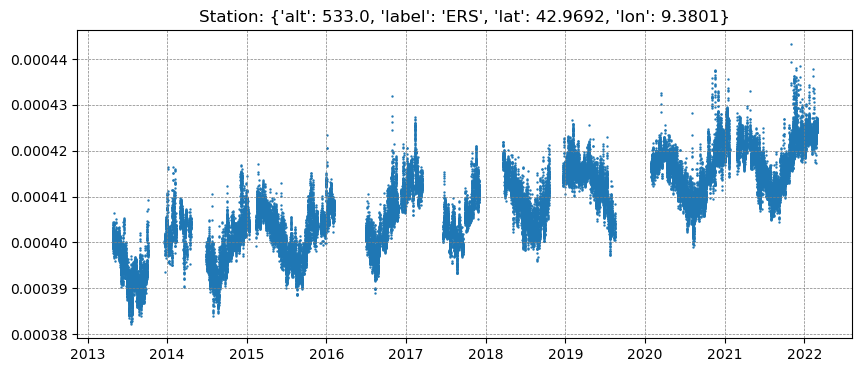

In [19]:
fig, ax = plt.subplots(figsize=(10,4))
ax.grid(color='grey', linestyle='--', linewidth=0.5)
ax.set_title('Station: ' + str(dataset.station['location']))
ax.scatter(data.time, data.value, s=0.5) # s = size of marker

### Aggreate data plot

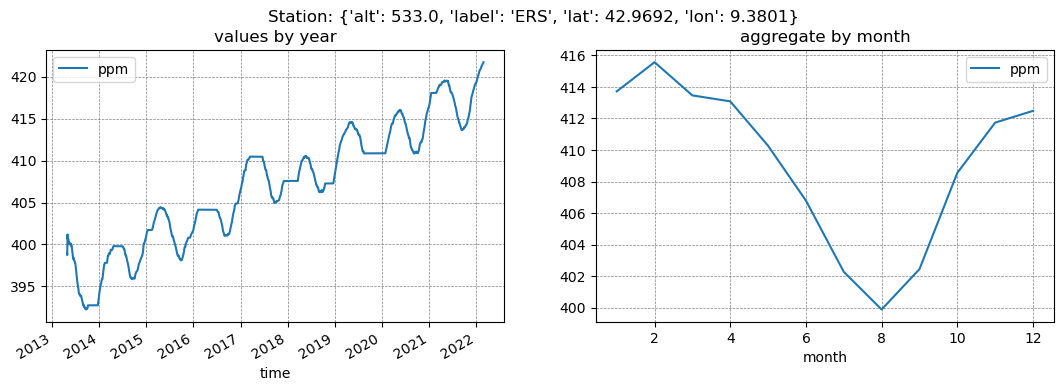

In [20]:
# create a plot with running average and aggreate by month
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig.suptitle('Station: ' + str(dataset.station['location'])+ '\n', fontsize=12)

# a smothed average by year, makes a trend clearly visible
data.ewm(span = 3600).mean().plot(y='ppm', grid=True, ax=ax1)
ax1.set_title('values by year')
ax1.grid(color='grey', linestyle='--', linewidth=0.5)

data.groupby(['month'], sort=False, group_keys=False ).mean().sort_index().plot(y='ppm',grid=True, ax=ax2)
ax2.set_title('aggregate by month')
ax2.grid(color='grey', linestyle='--', linewidth=0.5)

plt.show()

### Boxplot

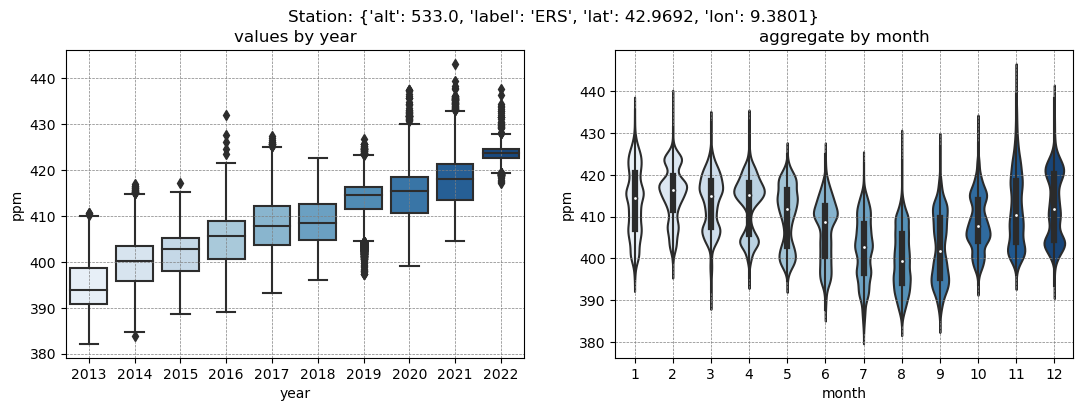

In [21]:
# create a more fancy plot with seaborn

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig.suptitle('Station: ' + str(dataset.station['location'])+ '\n', fontsize=12)
sns.boxplot(data=data, x='year', y='ppm', palette='Blues', ax=ax1)
ax1.set_title('values by year')
ax1.grid(color='grey', linestyle='--', linewidth=0.5)

sns.violinplot(data=data, x='month', y='ppm', palette='Blues', ax=ax2)
ax2.set_title('aggregate by month')
ax2.grid(color='grey', linestyle='--', linewidth=0.5)

plt.show()

### Loop through the collection

Since we now have a better understanding of the underlying data, we can plot many datasets side by side to compare.<br>
We demonstrate a simple filter implententation for countryand/or station id. If you want to have all set the filter to an empty string.<br>
The following example finds all stations from Switzerland.

  0%|          | 0/132 [00:00<?, ?it/s]

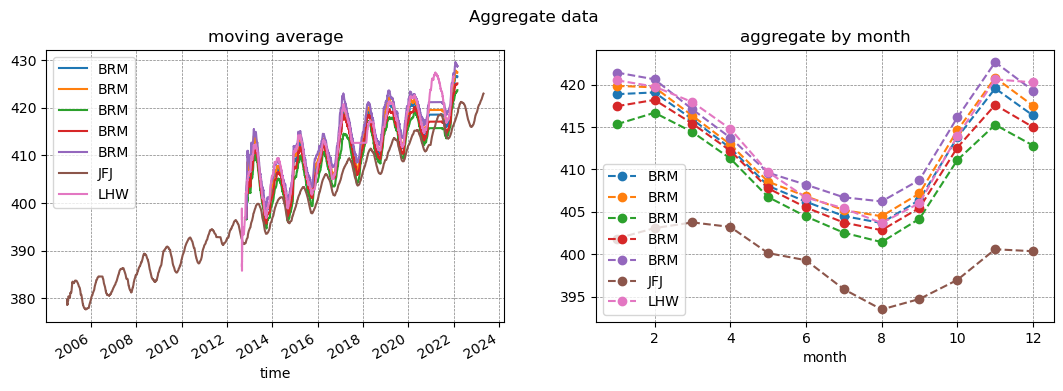

In [22]:
country = 'CH'
stationid = ''

# create a plot with running average and aggreate by month
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig.suptitle('Aggregate data', fontsize=12)

ax1.set_title('moving average')
ax1.grid(color='grey', linestyle='--', linewidth=0.5)


ax2.set_title('aggregate by month')
ax2.grid(color='grey', linestyle='--', linewidth=0.5)


for do in tqdm(coll.data):
    # filter
    if (len(country) > 0) and (do.station['specificInfo']['countryCode'] != country):        
        continue
    if (len(stationid) > 0) and (do.station['id'] != stationid):        
        continue
        
    # plot
    data = data_feature(do.data)
    data.ewm(span = 3600).mean().plot(y='ppm', grid=True, ax=ax1, label=do.station['id'])
    data = data.groupby(['month'], sort=False, group_keys=False ).mean().sort_index()
    data.plot(y='ppm',grid=True, ax=ax2, label=do.station['id'],marker='o', linestyle='dashed')
    
plt.show()
    

### BoxPlot for all stations

In [23]:
def sub_meta(do):
    '''
    A function to extract information from the metadata.
    A digitial Object (do) includes a very rich set of meta data.
    For conveninece we extract some of the informtion to disiplay.
    Returns a string, which is added to the data frame for grouping
    '''
    info ={}
    # sampling height
    info['sh'] = do.meta['specificInfo']['acquisition']['samplingHeight']
    # station id & name
    info['id'] = do.meta['specificInfo']['acquisition']['station']['id']
    info['name'] = do.meta['specificInfo']['acquisition']['station']['org']['name']
    
    return info
    

  0%|          | 0/132 [00:00<?, ?it/s]

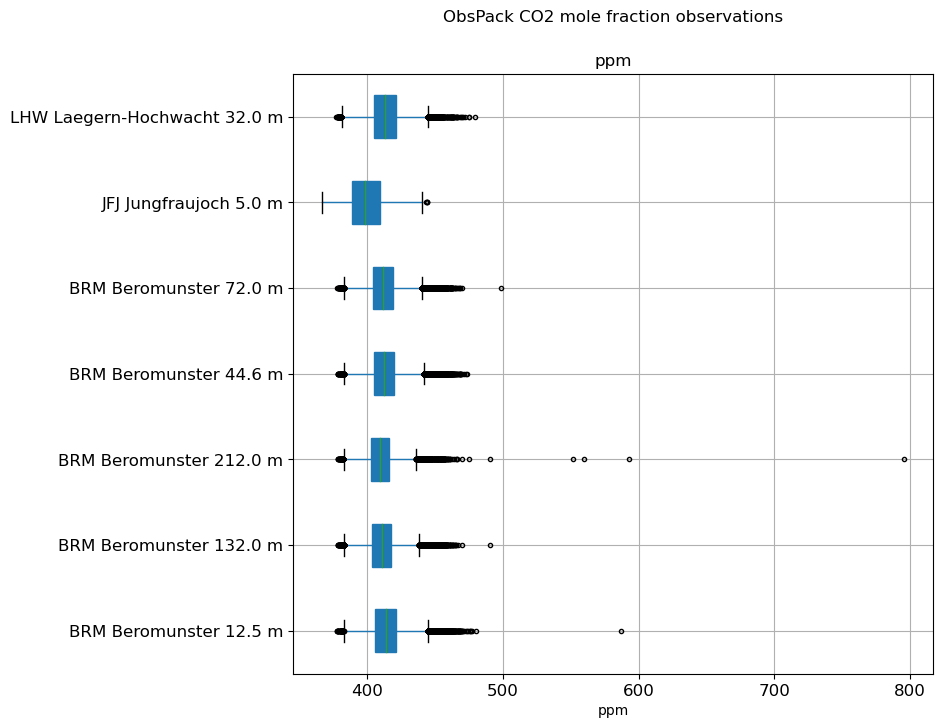

In [24]:
country = 'CH'
stationid = ''

# depending on how many stations you want to display, 
# you probably want to adjust the figure and fontsize
# for all 132 stations you can try the following values
#figuresize = [10,24] 
#fontsize = 9

figuresize = [8,8] 
fontsize = 12

# Initialize the figure
f, ax = plt.subplots(figsize=figuresize)
frames= []

#------------------------------------
for do in tqdm(coll.data):
    # filter
    if (len(country) > 0) and (do.station['specificInfo']['countryCode'] != country):        
        continue
    if (len(stationid) > 0) and (do.station['id'] != stationid):        
        continue
        
    data = data_feature(do.data)
    info = sub_meta(do)    
    data['label'] = f"{info['id']} {info['name']} {info['sh']} m"
    frames.append(data)
    
result = pd.concat(frames)
result.boxplot('ppm',by='label',vert=False, ax=ax, fontsize=fontsize,flierprops={'marker': '.'},patch_artist = True)

f.suptitle('ObsPack CO2 mole fraction observations')
ax.set_xlabel('ppm')
plt.show()